In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [95]:
df = pd.read_csv("../out/results.csv", sep=";")
df = df.set_index("n_rays")
df_rps["rps_ovdb"] = df.index / df["time_ovdb"]
df_rps["rps_nvdb_cpu"] = df.index /df["time_nvdb_cpu"] 
df_rps["rps_nvdb_gpu"] = df.index / df["time_nvdb_gpu"]
df_rps

,rps_ovdb,rps_nvdb_cpu,rps_nvdb_gpu
n_rays,,,
16,3.701819e+05,1.315995e+05,8.605204e+04
34,5.649342e+05,8.274721e+05,3.509779e+04
76,6.856112e+05,1.100317e+06,2.193432e+05
165,8.967879e+05,1.454180e+06,2.890705e+05
362,1.035928e+06,1.694630e+06,6.320837e+05
789,1.104210e+06,1.956326e+06,1.335222e+06
1722,1.125777e+06,1.855453e+06,3.220335e+06
3756,1.149552e+06,2.085763e+06,8.092525e+06
8192,1.147445e+06,2.107104e+06,1.892472e+07


FileNotFoundError: [Errno 2] No such file or directory: '../out/plots/execution_time.pdf'

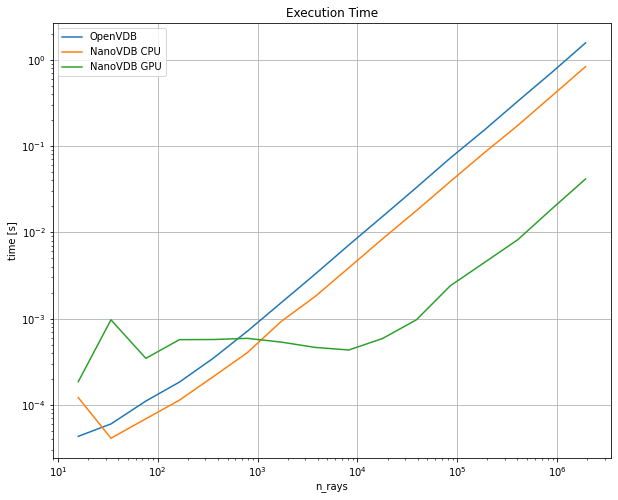

In [146]:
plt.rcParams["figure.figsize"] = (10, 8)

cols = ["time_ovdb", "time_nvdb_cpu", "time_nvdb_gpu"]
cols_names = ["OpenVDB", "NanoVDB CPU", "NanoVDB GPU"]


df.plot(y=cols)
plt.legend()
plt.grid()
plt.legend(cols_names)
plt.yscale("log")
plt.xscale("log")
plt.ylabel("time [s]")
plt.title("Execution Time")
plt.show()


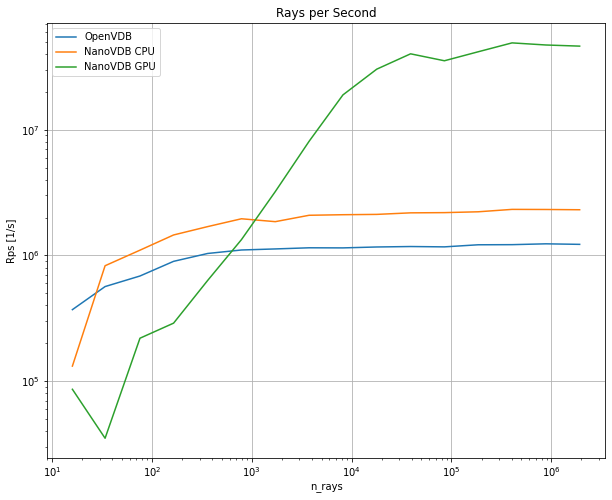

In [84]:
plt.rcParams["figure.figsize"] = (10, 8)

cols = ["rps_ovdb", "rps_nvdb_cpu", "rps_nvdb_gpu"]
cols_names = ["OpenVDB", "NanoVDB CPU", "NanoVDB GPU"]


df.plot(y=cols)
plt.legend()
plt.grid()
plt.legend(cols_names)
plt.yscale("log")
plt.xscale("log")
plt.ylabel("Rps [1/s]")
plt.title("Rays per Second")
plt.show()

Text(0.5, 1.0, 'Relative Speed-Up for 1923096 rays (OpenVDB=1)')

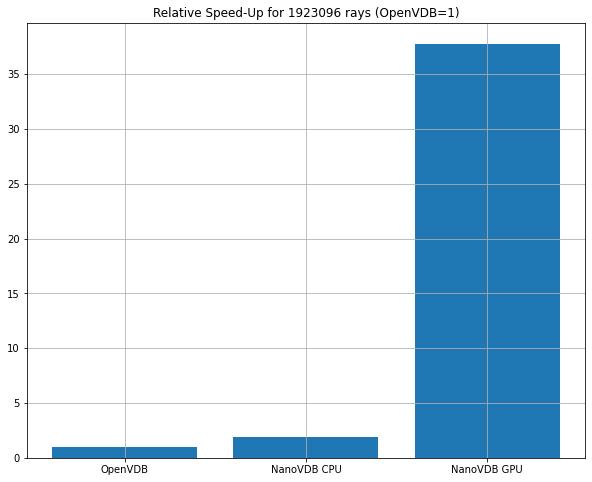

In [145]:
series = df_rps.iloc[-1]
series = series * 1/ series.nsmallest(1)[0]
n_rays = df_rps.index[-1]

plt.bar(cols_names, series.values)
plt.grid()
plt.title(f"Relative Speed-Up for {n_rays} rays (OpenVDB=1)")